# Suvendu Bista
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01)  
**Lab Title:** Classification Using KNN and RNN Algorithms

In [11]:
# Step 1: Loading and Preparing the Dataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Wine dataset
wine = load_wine()

# Convert to DataFrame for easier exploration
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Basic data exploration
print("Feature names:\n", wine.feature_names)
print("\nClass distribution:\n", df['target'].value_counts())

# Displaying first 5 rows
df.head()


Feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
# Splitting the dataset into 80% training and 20% testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=42, stratify=wine.target
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 142 samples
Testing set size: 36 samples


In [13]:
# Step 2: Implement K-Nearest Neighbors (KNN) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of k values to test
k_values = [1, 5, 11, 15, 21]

# Dictionary to store accuracy results
accuracy_results = {}

for k in k_values:
    # Create KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Training the model on training data
    knn.fit(X_train, y_train)
    
    # Predicting labels for test data
    y_pred = knn.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Storing accuracy in dictionary
    accuracy_results[k] = accuracy
    
    print(f"Accuracy for k={k}: {accuracy:.4f}")


Accuracy for k=1: 0.7778
Accuracy for k=5: 0.8056
Accuracy for k=11: 0.8056
Accuracy for k=15: 0.8056
Accuracy for k=21: 0.8056


In [8]:
# Step 3: Implement Radius Neighbors (RNN)
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of radius values to test
radius_values = [350, 400, 450, 500, 550, 600]

# Dictionary to store accuracy results
radius_accuracy_results = {}

for radius in radius_values:
    # Create Radius Neighbors classifier with given radius
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label='most_frequent')
    
    # Training the model on training data
    rnn.fit(X_train, y_train)
    
    # Predicting labels for test data
    y_pred = rnn.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Storing accuracy in dictionary
    radius_accuracy_results[radius] = accuracy
    
    print(f"Accuracy for radius={radius}: {accuracy:.4f}")


Accuracy for radius=350: 0.7222
Accuracy for radius=400: 0.6944
Accuracy for radius=450: 0.6944
Accuracy for radius=500: 0.6944
Accuracy for radius=550: 0.6667
Accuracy for radius=600: 0.6667


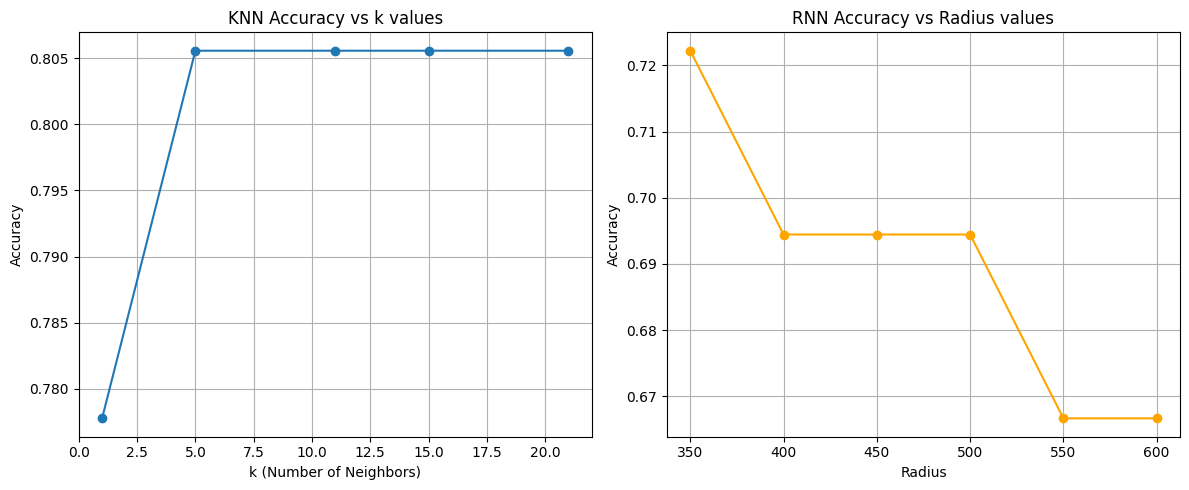

In [10]:
# Step 4: Visualize and Compare Results 
import matplotlib.pyplot as plt

# Plot accuracy for KNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title("KNN Accuracy vs k values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot accuracy for RNN
plt.subplot(1, 2, 2)
plt.plot(list(radius_accuracy_results.keys()), list(radius_accuracy_results.values()), marker='o', color='orange')
plt.title("RNN Accuracy vs Radius values")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()
